In [24]:
# Install the necessary libraries if not already installed

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
from torchvision.utils import make_grid, save_image
from torch.utils.data import Dataset, DataLoader
from PIL import Image

In [25]:
class PixelArtDataset(Dataset):
    def __init__(self, image_folders, transform=None):
        self.image_files = []
        for folder in image_folders:
            folder_path = os.path.join(folder)
            valid_images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
            self.image_files.extend(valid_images)
        
        if not self.image_files:
            raise ValueError(f"No valid image files found in the folders: {image_folders}")
        
        self.transform = transform
        print(f"Found {len(self.image_files)} images.")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image
    
# Set multiple dataset paths and transformations
dataset_paths = [
    '/Users/jamilsharif/Desktop/pokemon-images/images',
    '/Users/jamilsharif/Desktop/all_pokemon'
]
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Create dataset and data loader
pixel_art_dataset = PixelArtDataset(image_folders=dataset_paths, transform=transform)
pixel_art_dataloader = DataLoader(pixel_art_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)



Found 20078 images.


In [26]:
# The Generator Module
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, 256, 4, 1, 0, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)


In [28]:
# The Discriminator Module
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input).view(-1)


In [29]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
nz = 100  # Size of the latent vector
lr = 0.0002
beta1 = 0.5

# Instantiate models
netG = Generator(nz).to(device)
netD = Discriminator().to(device)

# Loss function and optimizers
criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))


Using device: cpu


Epoch [0/50] Loss_D: 1.0545 Loss_G: 1.0883


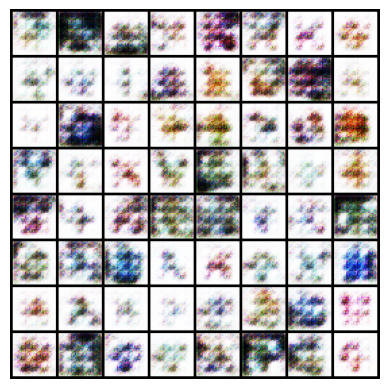

Epoch [1/50] Loss_D: 1.7051 Loss_G: 5.4791
Epoch [2/50] Loss_D: 1.6055 Loss_G: 0.9498
Epoch [3/50] Loss_D: 0.6333 Loss_G: 3.1699
Epoch [4/50] Loss_D: 0.5658 Loss_G: 2.6218
Epoch [5/50] Loss_D: 0.5677 Loss_G: 3.0329
Epoch [6/50] Loss_D: 0.5198 Loss_G: 2.7666
Epoch [7/50] Loss_D: 0.6013 Loss_G: 1.5142
Epoch [8/50] Loss_D: 0.4118 Loss_G: 2.7860
Epoch [9/50] Loss_D: 0.4886 Loss_G: 1.8800
Epoch [10/50] Loss_D: 1.6047 Loss_G: 2.7477


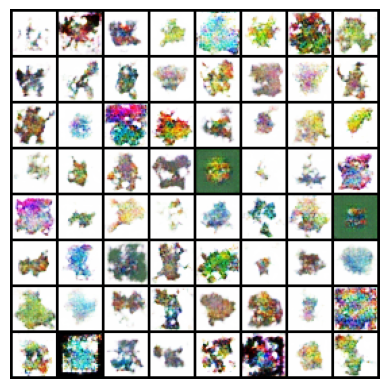

Epoch [11/50] Loss_D: 1.0010 Loss_G: 1.4707
Epoch [12/50] Loss_D: 0.7886 Loss_G: 2.1601
Epoch [13/50] Loss_D: 1.9223 Loss_G: 0.7520
Epoch [14/50] Loss_D: 0.3313 Loss_G: 2.1154
Epoch [15/50] Loss_D: 0.8695 Loss_G: 1.4634
Epoch [16/50] Loss_D: 0.3424 Loss_G: 2.3569
Epoch [17/50] Loss_D: 0.8360 Loss_G: 3.2141
Epoch [18/50] Loss_D: 0.7832 Loss_G: 1.5036
Epoch [19/50] Loss_D: 1.1223 Loss_G: 3.3416
Epoch [20/50] Loss_D: 0.7500 Loss_G: 1.4780


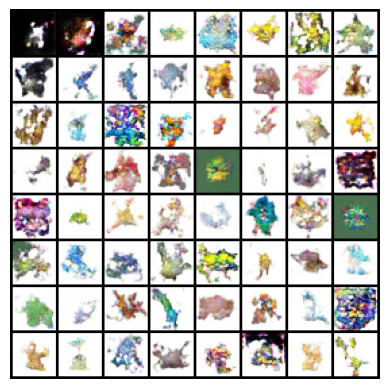

Epoch [21/50] Loss_D: 0.5004 Loss_G: 2.2786
Epoch [22/50] Loss_D: 0.5575 Loss_G: 3.6071
Epoch [23/50] Loss_D: 0.6201 Loss_G: 1.0016
Epoch [24/50] Loss_D: 1.1288 Loss_G: 3.4158
Epoch [25/50] Loss_D: 1.4434 Loss_G: 1.1496
Epoch [26/50] Loss_D: 0.4974 Loss_G: 1.8833
Epoch [27/50] Loss_D: 0.4114 Loss_G: 2.2779
Epoch [28/50] Loss_D: 0.2656 Loss_G: 2.6472
Epoch [29/50] Loss_D: 1.5851 Loss_G: 4.5708


In [30]:
# Training parameters
num_epochs = 50
real_label = 1
fake_label = 0
fixed_noise = torch.randn(64, nz, 1, 1).to(device)

# Function to show generated images
def show_generated_images(images):
    grid = make_grid(images, padding=2, normalize=True)
    plt.imshow(np.transpose(grid.cpu().numpy(), (1, 2, 0)))
    plt.axis("off")
    plt.show()

# Training loop
for epoch in range(num_epochs):
    for i, data in enumerate(pixel_art_dataloader, 0):
        # Update Discriminator
        netD.zero_grad()
        real_images = data.to(device)
        batch_size = real_images.size(0)
        labels = torch.full((batch_size,), real_label, dtype=torch.float).to(device)
        output = netD(real_images)
        errD_real = criterion(output, labels)
        errD_real.backward()

        noise = torch.randn(batch_size, nz, 1, 1).to(device)
        fake_images = netG(noise)
        labels.fill_(fake_label)
        labels = labels.to(dtype=torch.float, device=device)
        output = netD(fake_images.detach())
        errD_fake = criterion(output, labels)
        errD_fake.backward()
        optimizerD.step()

        # Update Generator
        netG.zero_grad()
        labels.fill_(real_label)
        labels = labels.to(dtype=torch.float, device=device)
        output = netD(fake_images)
        errG = criterion(output, labels)
        errG.backward()
        optimizerG.step()

    # Logging
    print(f'Epoch [{epoch}/{num_epochs}] Loss_D: {(errD_real + errD_fake):.4f} Loss_G: {errG:.4f}')

    # Show generated images every 10 epochs
    if epoch % 10 == 0:
        fake_images = netG(fixed_noise)
        show_generated_images(fake_images)
        save_image(fake_images, f'generated_images_{epoch}.png', normalize=True)
